<a href="https://colab.research.google.com/github/FelippeTN/-NF3-BIG-DATA-Felippe-Toscano-Nalim/blob/main/Trabalho_de_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
#Criando Dataset Questão 1
import pandas as pd
import re
import requests
import io

url = "https://www.w3resource.com/python-exercises/pandas/filter/world_alcohol.csv"
data = requests.get(url).content

dados = pd.read_csv(io.StringIO(data.decode('utf-8')))

(dados.head())

,Year,WHO region,Country,Beverage Types,Display Value
0,1986,Western Pacific,Viet Nam,Wine,0.00
1,1986,Americas,Uruguay,Other,0.50
2,1985,Africa,Cte d'Ivoire,Wine,1.62
3,1986,Americas,Colombia,Beer,4.27
4,1987,Americas,Saint Kitts and Nevis,Beer,1.98


In [149]:
#Questão 1 - Letra A
grupos = dados.groupby("Beverage Types", group_keys=True)

TiposB = pd.concat([grupos.get_group(g) for g in grupos.groups])

TiposB.to_csv("csv", index=0)

print(TiposB)


    Year       WHO region                                Country  \
3   1986         Americas                               Colombia   
4   1987         Americas                  Saint Kitts and Nevis   
11  1989         Americas                              Guatemala   
12  1985  Western Pacific       Lao People's Democratic Republic   
17  1989           Africa                             Seychelles   
..   ...              ...                                    ...   
90  1989           Africa                                 Malawi   
96  1985           Europe                             Luxembourg   
97  1984  South-East Asia                              Indonesia   
98  1984           Africa                      Equatorial Guinea   
99  1985  South-East Asia  Democratic People's Republic of Korea   

   Beverage Types  Display Value  
3            Beer           4.27  
4            Beer           1.98  
11           Beer           0.62  
12           Beer           0.00  
17      

In [150]:
#Questão 1 - Letra B

grupos = dados.groupby(["WHO region", "Year"], group_keys=True)

regiao_ano = pd.concat([grupos.get_group(g) for g in grupos.groups])

regiao_ano.to_csv("csv", index=0)

print(regiao_ano)

    Year       WHO region                           Country Beverage Types  \
9   1984           Africa                           Nigeria          Other   
19  1984           Africa                             Kenya           Beer   
95  1984           Africa                             Niger          Other   
98  1984           Africa                 Equatorial Guinea           Wine   
2   1985           Africa                      Cte d'Ivoire           Wine   
..   ...              ...                               ...            ...   
14  1985  Western Pacific                          Viet Nam        Spirits   
0   1986  Western Pacific                          Viet Nam           Wine   
31  1986  Western Pacific  Micronesia (Federated States of)           Wine   
28  1987  Western Pacific                          Viet Nam           Beer   
56  1987  Western Pacific                          Viet Nam           Wine   

    Display Value  
9            6.10  
19           1.08  
95 

In [151]:
#Questão 1 - Letra C

ContarOcorrencias = dados.loc[:, ["WHO region", "Country"]].groupby("WHO region").value_counts()
soma = dados.loc[:, ["Display Value"]].sum()

print("Numero de ocorrencias de Regiões e Países:\n\n{}\n\n".format(ContarOcorrencias))
print("Soma da coluna valores por bebidas\n\n{}\n\n".format(soma))


Numero de ocorrencias de Regiões e Países:

WHO region       Country                         
Africa           Mauritius                           2
                 Mauritania                          2
                 Malawi                              2
                 Madagascar                          2
                 Comoros                             2
                                                    ..
Western Pacific  Viet Nam                            4
                 Papua New Guinea                    1
                 Micronesia (Federated States of)    1
                 Lao People's Democratic Republic    1
                 China                               1
Length: 80, dtype: int64


Soma da coluna valores por bebidas

Display Value    104.79
dtype: float64




<ipython-input-152-18d6212614a5>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = dados.groupby("Beverage Types").mean()


Média, Moda e Mediana da coluna valores. Agrupado por tipos de bebidas:                mean               mode  median
Beverage Types                                 
Beer            1.48                0.0    0.66
Other           0.65                0.0    0.00
Spirits         1.47  [0.0, 0.01, 3.06]    1.62
Wine            0.87                0.0    0.04


Descrição estatística da coluna valores. Agrupado por tipos de bebidas:                count  mean   std  min   25%   50%   75%   max
Beverage Types                                                
Beer             24.0  1.48  1.82  0.0  0.10  0.66  2.22  6.82
Other            23.0  0.65  1.56  0.0  0.00  0.00  0.40  6.10
Spirits          21.0  1.47  1.29  0.0  0.08  1.62  2.25  4.51
Wine             27.0  0.87  1.73  0.0  0.00  0.04  1.08  7.38


Gráfico Tipo X Preços:



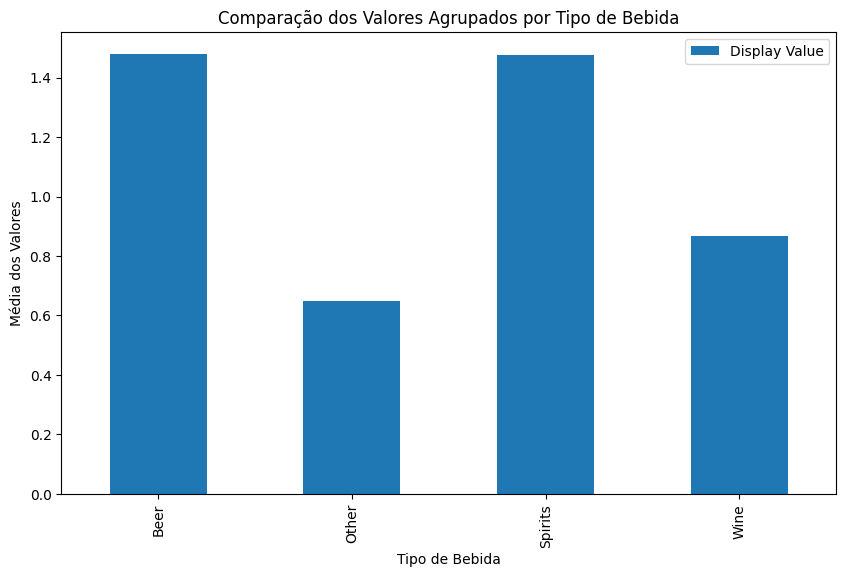

In [152]:
#Questão 1 - Letra D

import matplotlib.pyplot as plt

estatisticas = dados.groupby("Beverage Types")["Display Value"].agg(["mean", pd.Series.mode, "median"])
descritivas = dados.groupby("Beverage Types")["Display Value"].describe()
data = dados.groupby("Beverage Types").mean()

grafico = data.plot(kind='bar', figsize=(10, 6), y="Display Value")
grafico.set_xlabel('Tipo de Bebida')
grafico.set_ylabel('Média dos Valores')
grafico.set_title('Comparação dos Valores Agrupados por Tipo de Bebida')

print("Média, Moda e Mediana da coluna valores. Agrupado por tipos de bebidas:{}\n".format(round(estatisticas, 2)))
print("\nDescrição estatística da coluna valores. Agrupado por tipos de bebidas:{}\n".format(round(descritivas, 2)))
print("\nGráfico Tipo X Preços:\n")


In [153]:
#Questão 1 - Letra E
bebidas_1985 = dados.loc[dados['Year'] == 1985, 'Beverage Types']
print("Coluna de bebidas do ano de 1985:")
print(bebidas_1985)

display_value_acima_4 = dados.loc[dados['Display Value'] > 4, 'Display Value']
print("Coluna de Display Value com valores acima de 4:")
print(display_value_acima_4)


Coluna de bebidas do ano de 1985:
2        Wine
7     Spirits
12       Beer
14    Spirits
24      Other
26       Wine
33      Other
35    Spirits
44      Other
50      Other
63      Other
71      Other
76       Beer
77    Spirits
80      Other
81       Wine
85       Wine
94    Spirits
96       Wine
99       Wine
Name: Beverage Types, dtype: object
Coluna de Display Value com valores acima de 4:
3     4.27
9     6.10
21    4.51
30    4.48
41    6.82
57    5.10
91    4.43
96    7.38
Name: Display Value, dtype: float64


In [154]:
#Criando Dataset Questão 2
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/FelippeTN/-NF3-BIG-DATA-Felippe-Toscano-Nalim/main/cursos-prouni.csv"
df = pd.read_csv(url)

(df.head())


,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,9999.99,15.0,14.0,NaN,NaN,706710394154,Medicina,Campo Grande,MS,NTAwMjAwNDAyNzA0,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,NaN,NaN
1,Bacharelado,Noturno,9836.40,1.0,NaN,NaN,NaN,104191210567043,Enfermagem,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,NaN,NaN,NaN
2,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,MzUxNTA2MTUwMzA4,Universidade Cidade de São Paulo - UNICID,UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...,1002328,Medicina,739.62,738.08,738.96,718.64
3,Bacharelado,Noturno,9689.34,3.0,2.0,NaN,NaN,104191212798093,Psicologia,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Psicologia,651.00,652.22,NaN,NaN
4,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,AC,MTIwMjAwNDAwNDAx,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,658996,Medicina,758.32,723.94,734.92,711.26


In [155]:
#Questão 2 - Letra A
df = pd.read_csv(url)
df = df.fillna(0.0)

print(df.head())

          grau     turno  mensalidade  bolsa_integral_cotas  \
0  Bacharelado  Integral      9999.99                  15.0   
1  Bacharelado   Noturno      9836.40                   1.0   
2  Bacharelado  Integral      9715.61                   2.0   
3  Bacharelado   Noturno      9689.34                   3.0   
4  Bacharelado  Integral      9674.34                   4.0   

   bolsa_integral_ampla  bolsa_parcial_cotas  bolsa_parcial_ampla  \
0                  14.0                  0.0                  0.0   
1                   0.0                  0.0                  0.0   
2                   5.0                  6.0                 10.0   
3                   2.0                  0.0                  0.0   
4                   1.0                  5.0                  2.0   

          curso_id curso_busca  cidade_busca uf_busca     cidade_filtro  \
0     706710394154    Medicina  Campo Grande       MS  NTAwMjAwNDAyNzA0   
1  104191210567043  Enfermagem       Crateus       CE  M

In [156]:
#Questão 2 - Letra B

grupo_grau = df.groupby('grau').agg({
    'nota_integral_ampla': 'mean',
    'nota_integral_cotas': 'mean',
    'nota_parcial_ampla': 'mean',
    'nota_parcial_cotas': 'mean'
})

print(grupo_grau)

              nota_integral_ampla  nota_integral_cotas  nota_parcial_ampla  \
grau                                                                         
Bacharelado            500.687570           302.143202          218.539330   
Licenciatura           418.241645           182.920068          203.993863   
Tecnológico            404.593982           154.569393          195.923215   

              nota_parcial_cotas  
grau                              
Bacharelado            80.377137  
Licenciatura           60.895490  
Tecnológico            55.503877  


In [157]:
#Questão 2 - Letra C

cursos_selecionados = ['Matemática', 'Medicina', 'Pedagogia']
df_cursos = df[df['curso_busca'].isin(cursos_selecionados)]

# Agrupar os dados pelos cursos e obter estatísticas
grupo_cursos = df_cursos.groupby('curso_busca').agg({
    'nota_integral_ampla': 'mean',
    'nota_integral_cotas': 'mean',
    'nota_parcial_ampla': 'mean',
    'nota_parcial_cotas': 'mean'
})

# Imprimir o resultado do agrupamento
print(grupo_cursos)



             nota_integral_ampla  nota_integral_cotas  nota_parcial_ampla  \
curso_busca                                                                 
Matemática            385.913414            85.325967          227.258630   
Medicina              737.457097           637.154677          144.067581   
Pedagogia             497.657237           310.695444          168.579311   

             nota_parcial_cotas  
curso_busca                      
Matemática            54.775912  
Medicina             122.805968  
Pedagogia             90.339593  


In [158]:
#Questão 2 - Letra D

grupo_estado = df.groupby('uf_busca').agg({
    'nota_integral_ampla': 'mean',
    'nota_integral_cotas': 'mean',
    'nota_parcial_ampla': 'mean',
    'nota_parcial_cotas': 'mean'
})

print(grupo_estado)

          nota_integral_ampla  nota_integral_cotas  nota_parcial_ampla  \
uf_busca                                                                 
AC                 458.099901           156.102463          377.265517   
AL                 501.155719           330.490703          157.449541   
AM                 469.471748           260.839068          143.712308   
AP                 463.846758           255.750228          187.748402   
BA                 450.464327           173.424495          236.860926   
CE                 466.679485           303.281814          253.300637   
DF                 500.669690           253.512719          214.898589   
ES                 489.735248           272.410255          247.212582   
GO                 451.565133           257.732034          196.332582   
MA                 472.301237           214.449426          302.875876   
MG                 467.660383           264.319157          215.966946   
MS                 416.811771         

In [159]:
#Questão 2 - E
cursos_tecnologicos = df[df['grau'] == 'Tecnológico']

grupo_cursos_tecnologicos = cursos_tecnologicos.groupby('nome').agg({
    'nota_integral_ampla': 'mean',
    'nota_integral_cotas': 'mean',
    'nota_parcial_ampla': 'mean',
    'nota_parcial_cotas': 'mean'
})

print(grupo_cursos_tecnologicos)

                                       nota_integral_ampla  \
nome                                                         
Agroindústria                                   570.520000   
Agronegócio                                     457.151748   
Agropecuária                                    579.020000   
Alimentos                                       558.400000   
Análise e Desenvolvimento de Sistemas           411.514782   
...                                                    ...   
Tecnólogo em Metalurgia                         554.720000   
Turismo Receptivo                               540.880000   
Visagismo e Terapias Capilares                  586.300000   
Viticultura e Enologia                          512.300000   
Óptica e Optometria                             620.830000   

                                       nota_integral_cotas  \
nome                                                         
Agroindústria                                   524.800000   
Agroneg

In [160]:
#Questão 2 - Letra F
df = pd.read_csv(url)
df = df.fillna(0.0)

df = df.drop("cidade_filtro", axis=1)

print(df)

               grau              turno  mensalidade  bolsa_integral_cotas  \
0       Bacharelado           Integral      9999.99                  15.0   
1       Bacharelado            Noturno      9836.40                   1.0   
2       Bacharelado           Integral      9715.61                   2.0   
3       Bacharelado            Noturno      9689.34                   3.0   
4       Bacharelado           Integral      9674.34                   4.0   
...             ...                ...          ...                   ...   
41442  Licenciatura  Curso a Distância       149.00                   1.0   
41443   Tecnológico  Curso a Distância       144.00                   1.0   
41444   Tecnológico         Vespertino       139.00                   1.0   
41445   Bacharelado  Curso a Distância       139.00                   1.0   
41446   Tecnológico  Curso a Distância       139.00                   3.0   

       bolsa_integral_ampla  bolsa_parcial_cotas  bolsa_parcial_ampla  \
0 

In [161]:
#Questão 2 - Letra G
medicina_df = df[df["curso_busca"].str.contains("Medicina", case=False)]

# Calcular a média das mensalidades
media_mensalidades = medicina_df["mensalidade"].mean()

# Imprimir a média das mensalidades dos cursos de Medicina
print("Média das mensalidades dos cursos de Medicina: R$", media_mensalidades)

Média das mensalidades dos cursos de Medicina: R$ 2391.160634920635


In [162]:
#Questão 2 - Letra H
tempo_integral_df = df[df["turno"].str.contains("integral", case=False)]

media_notas_corte = tempo_integral_df["nota_integral_ampla"].mean()

print("Média das notas de corte dos cursos de tempo integral:", round(media_notas_corte, 2))

Média das notas de corte dos cursos de tempo integral: 605.08


In [163]:
#Questão 2 - Letra I
bacharelado_integral_df = df[(df["grau"] == "Bacharelado") & (df["turno"].str.contains("integral", case=False))]

estatisticas_descritivas = bacharelado_integral_df["nota_integral_ampla"].describe()

print("Estatística Descritiva das Notas Integral Ampla dos cursos de Bacharelado:")
print(estatisticas_descritivas)

Estatística Descritiva das Notas Integral Ampla dos cursos de Bacharelado:
count    587.000000
mean     608.075639
std      200.720063
min        0.000000
25%      617.700000
50%      655.940000
75%      700.830000
max      781.200000
Name: nota_integral_ampla, dtype: float64


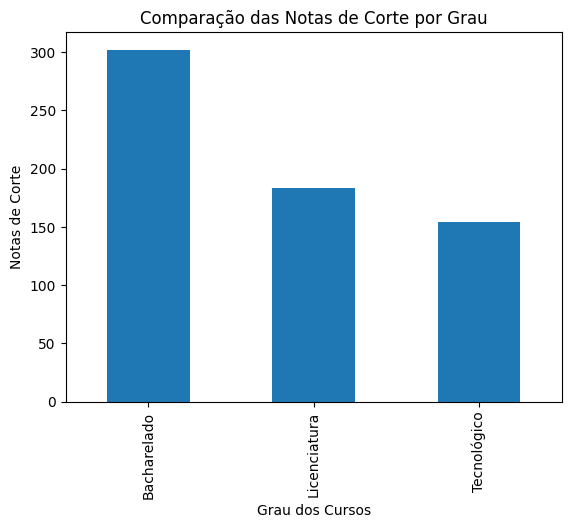

In [164]:
#Questão 2 - Letra J

df['nota_integral_cotas'] = pd.to_numeric (df['nota_integral_cotas'], errors='coerce')

integral = df.groupby('grau') ['nota_integral_cotas'].mean()

integral.plot.bar()


plt.xlabel('Grau dos Cursos')

plt.ylabel('Notas de Corte')

plt.title('Comparação das Notas de Corte por Grau')

plt.show()
